# Task By Dikshani Kumbhare


# Problem Statement
The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive.

Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinions among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled.

Determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality. Predict the quality of wine on the basis of giving features. Deploy the model.

In [13]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Manoj\Desktop\internship\task 6\\Red Wine Quality.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [14]:
import pandas as pd
import seaborn as sns
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import norm, boxcox
from collections import Counter
from scipy import stats

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Summary Of the dataset

In [17]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# find dulipcate value 

In [18]:
df.duplicated().sum()

240

# find the correlation and covarince of data

In [19]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [20]:
df.cov()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              3.031416         -0.079851     0.227820   
volatile acidity          -0.079851          0.032062    -0.019272   
citric acid                0.227820         -0.019272     0.037947   
residual sugar             0.281756          0.000484     0.039434   
chlorides                  0.007679          0.000517     0.001869   
free sulfur dioxide       -2.800921         -0.019674    -0.124252   
total sulfur dioxide      -6.482346          0.450426     0.227697   
density                    0.002195          0.000007     0.000134   
pH                        -0.183586          0.006495    -0.016298   
sulphates                  0.054010         -0.007921     0.010328   
alcohol                   -0.114421         -0.038600     0.022815   
quality                    0.174424         -0.056476     0.035612   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.281756   0.007679            -2.800921   
volatile acidity            0.000484   0.000517            -0.019674   
citric acid                 0.039434   0.001869            -0.124252   
residual sugar              1.987897   0.003690             2.758611   
chlorides                   0.003690   0.002215             0.002738   
free sulfur dioxide         2.758611   0.002738           109.414884   
total sulfur dioxide        9.416441   0.073387           229.737521   
density                     0.000945   0.000018            -0.000433   
pH                         -0.018644  -0.001926             0.113653   
sulphates                   0.001321   0.002962             0.091592   
alcohol                     0.063219  -0.011092            -0.773698   
quality                     0.015635  -0.004900            -0.427907   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -6.482346  0.002195 -0.183586   0.054010   
volatile acidity                  0.450426  0.000007  0.006495  -0.007921   
citric acid                       0.227697  0.000134 -0.016298   0.010328   
residual sugar                    9.416441  0.000945 -0.018644   0.001321   
chlorides                         0.073387  0.000018 -0.001926   0.002962   
free sulfur dioxide             229.737521 -0.000433  0.113653   0.091592   
total sulfur dioxide           1082.102373  0.004425 -0.337699   0.239471   
density                           0.004425  0.000004 -0.000100   0.000048   
pH                               -0.337699 -0.000100  0.023835  -0.005146   
sulphates                         0.239471  0.000048 -0.005146   0.028733   
alcohol                          -7.209298 -0.000998  0.033832   0.016907   
quality                          -4.917237 -0.000267 -0.007198   0.034413   

                       alcohol   quality  
fixed acidity        -0.114421  0.174424  
volatile acidity     -0.038600 -0.056476  
citric acid           0.022815  0.035612  
residual sugar        0.063219  0.015635  
chlorides            -0.011092 -0.004900  
free sulfur dioxide  -0.773698 -0.427907  
total sulfur dioxide -7.209298 -4.917237  
density              -0.000998 -0.000267  
pH                    0.033832 -0.007198  
sulphates             0.016907  0.034413  
alcohol               1.135647  0.409789  
quality               0.409789  0.652168

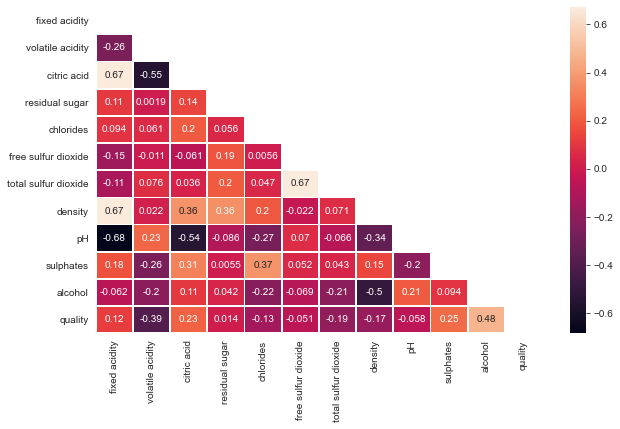

In [21]:

plt.figure(figsize=(10, 6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

# UNIVARIATE ANALYSIS

In [22]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

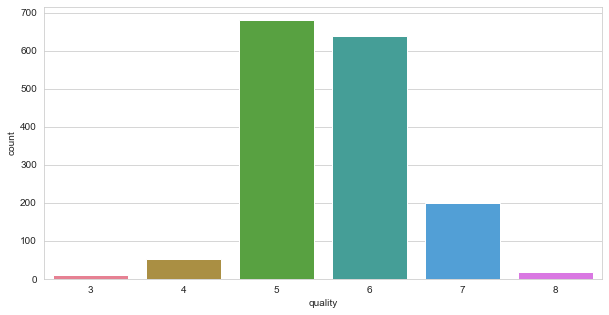

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(x="quality", data=df, palette='husl');

# observation
1. from above bar graph maximum quality is 5 then 6 other other is less

Histogram

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[]

<Figure size 2000x1000 with 0 Axes>

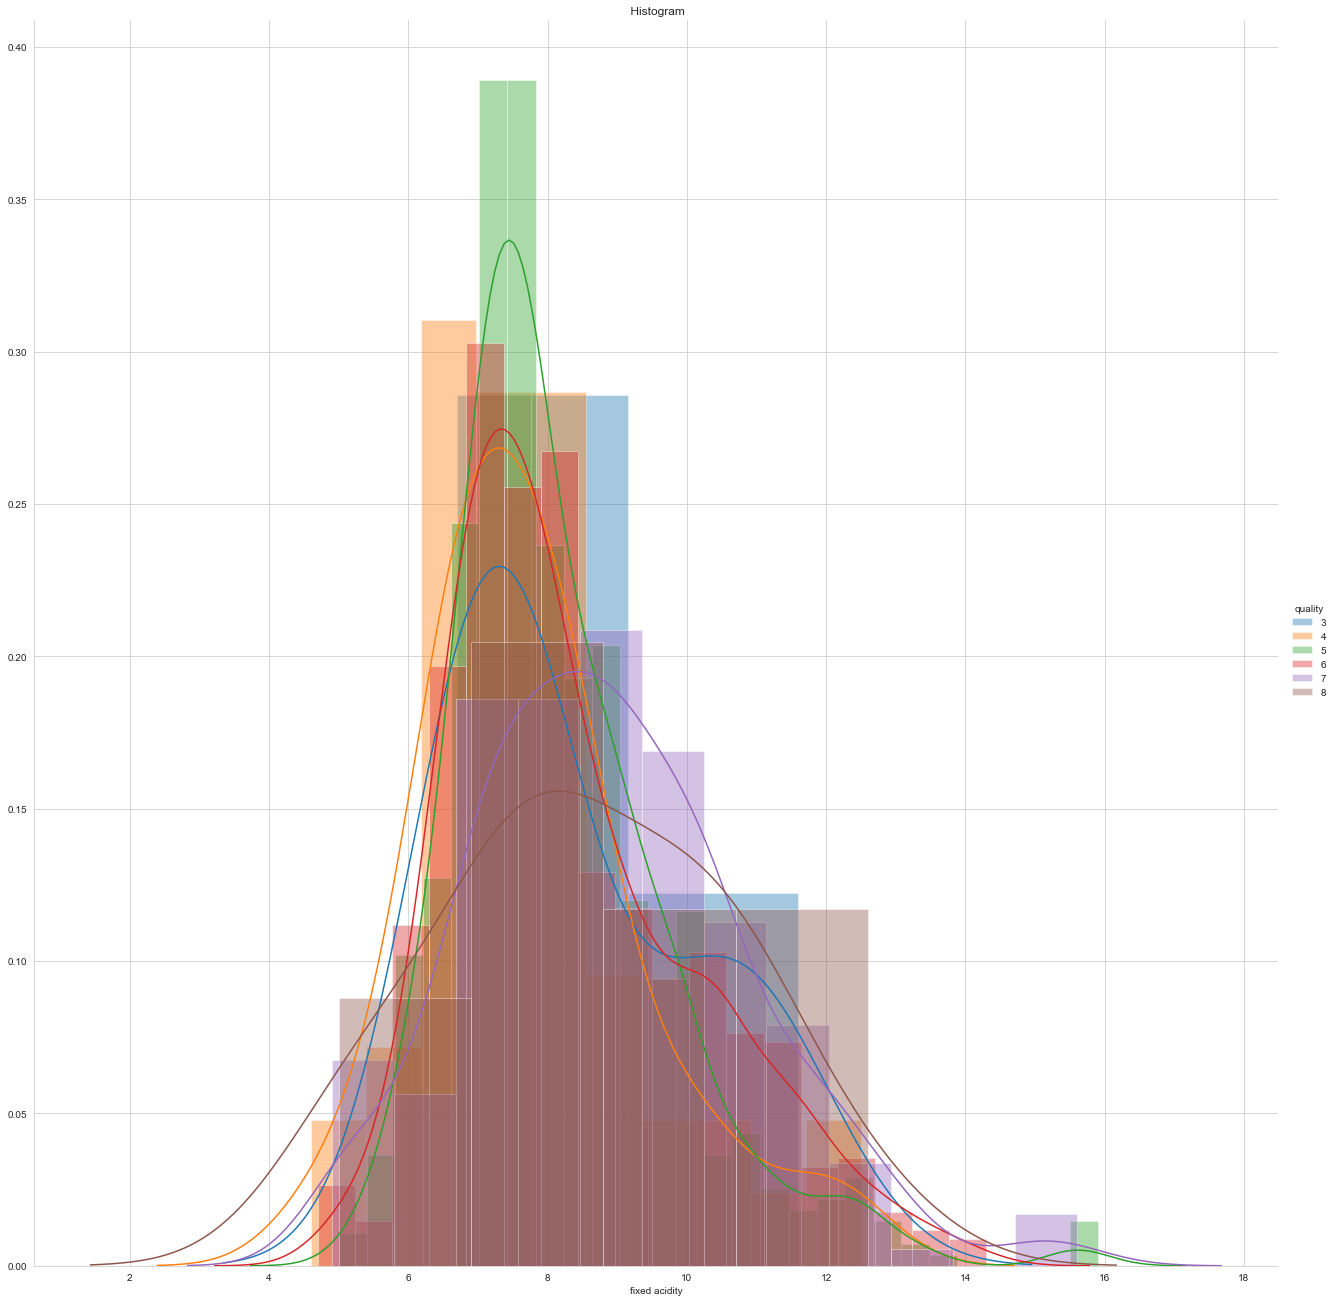

In [24]:

plt.figure(figsize=[20,10],dpi=100)
sbn.set_style("whitegrid")
sbn.FacetGrid(df, hue = "quality",size=18).map(sbn.distplot, "fixed acidity").add_legend()
plt.title(" Histogram")
plt.plot()

according to fixed acidity feature more in quality 5 so that most of the red wine consider in quality 5

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[]

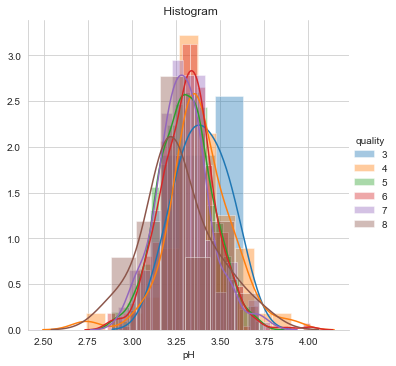

In [25]:


sbn.set_style("whitegrid")
sbn.FacetGrid(df, hue = "quality", size = 5.0).map(sbn.distplot, "pH").add_legend()
plt.title(" Histogram")
plt.plot()

accordin g to pH level of wine is more in quality 4 

# Bivariate analysis

# Box plot and violine plot

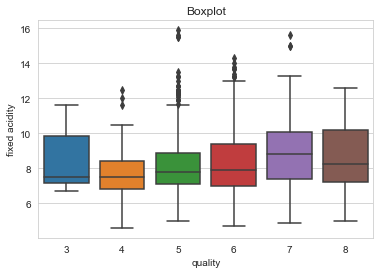

In [26]:


sbn.boxplot(x = "quality", y = "fixed acidity", data = df)
plt.title("Boxplot")
plt.show()


fixed acidity outlier is there in quality 4 5 6 and 7

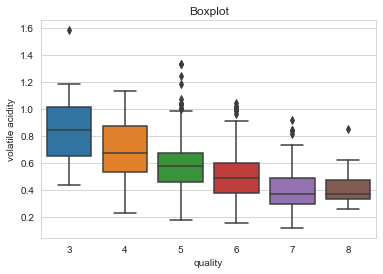

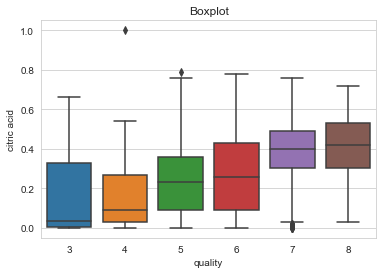

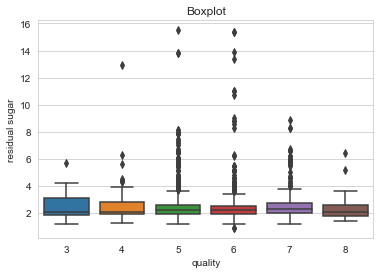

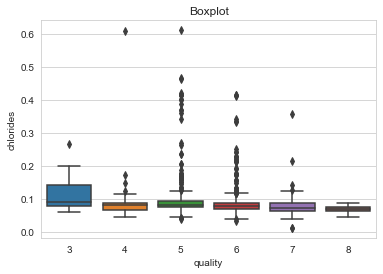

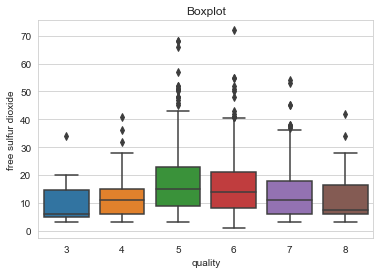

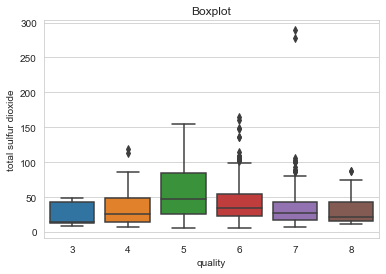

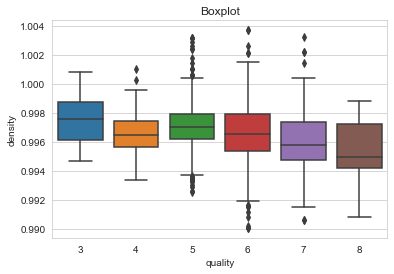

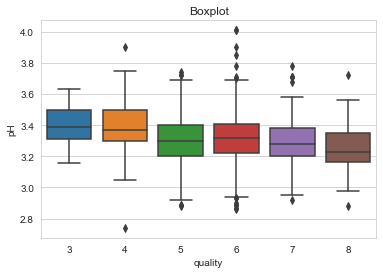

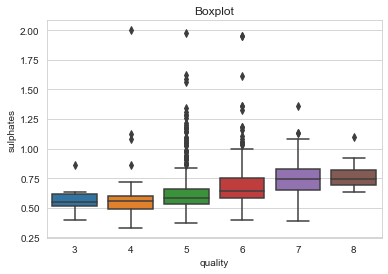

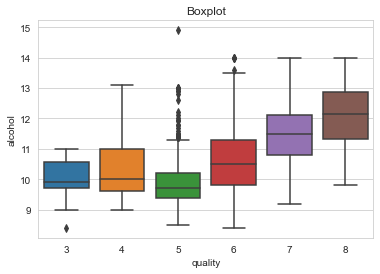

In [27]:


sbn.boxplot(x = "quality", y = "volatile acidity", data = df)
plt.title("Boxplot")
plt.show()
sbn.boxplot(x = "quality", y = "citric acid", data = df)
plt.title("Boxplot")
plt.show()
sbn.boxplot(x = "quality", y = "residual sugar", data = df)
plt.title("Boxplot")
plt.show()
sbn.boxplot(x = "quality", y = "chlorides", data = df)
plt.title("Boxplot")
plt.show()
sbn.boxplot(x = "quality", y = "free sulfur dioxide", data = df)
plt.title("Boxplot")
plt.show()
sbn.boxplot(x = "quality", y = "total sulfur dioxide", data = df)
plt.title("Boxplot")
plt.show()

sbn.boxplot(x = "quality", y = "density", data = df)
plt.title("Boxplot")
plt.show()
sbn.boxplot(x = "quality", y = "pH", data = df)
plt.title("Boxplot")
plt.show()
sbn.boxplot(x = "quality", y = "sulphates", data = df)
plt.title("Boxplot")
plt.show()
sbn.boxplot(x = "quality", y = "alcohol", data = df)
plt.title("Boxplot")
plt.show()


# outliers

In [28]:
Q1 =  df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.0999999999999996


In [29]:
f= df[(df['fixed acidity'] < Q1-1.5*IQR ) | (df['fixed acidity'] > Q3+1.5*IQR)]['fixed acidity']
f


205     12.8
206     12.8
243     15.0
244     15.0
264     12.5
294     13.3
328     13.4
338     12.4
339     12.5
347     13.8
353     13.5
359     12.6
363     12.5
364     12.8
366     12.8
374     14.0
381     13.7
391     13.7
394     12.7
409     12.5
429     12.8
440     12.6
442     15.6
446     12.5
470     13.0
472     12.5
509     13.3
510     12.4
516     12.5
538     12.9
544     14.3
548     12.4
554     15.5
555     15.5
557     15.6
559     13.0
560     12.7
564     13.0
565     12.7
596     12.4
599     12.7
601     13.2
603     13.2
611     13.2
652     15.9
680     13.3
811     12.9
814     12.6
1224    12.6
Name: fixed acidity, dtype: float64

In [30]:

# Above Upper bound
upper = df['fixed acidity'] >= (Q3+1.5*IQR) 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['fixed acidity'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: fixed acidity, Length: 1599, dtype: bool
(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
        359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
        442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
        555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
        652,  680,  811,  814, 1224], dtype=int64),)
Lower bound: 0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: fixed acidity, Length: 1599, dtype: bool
(array([], dtype=int64),)


In [31]:
df.shape

(1599, 12)

# Multi-variate analysis
Pair plot

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


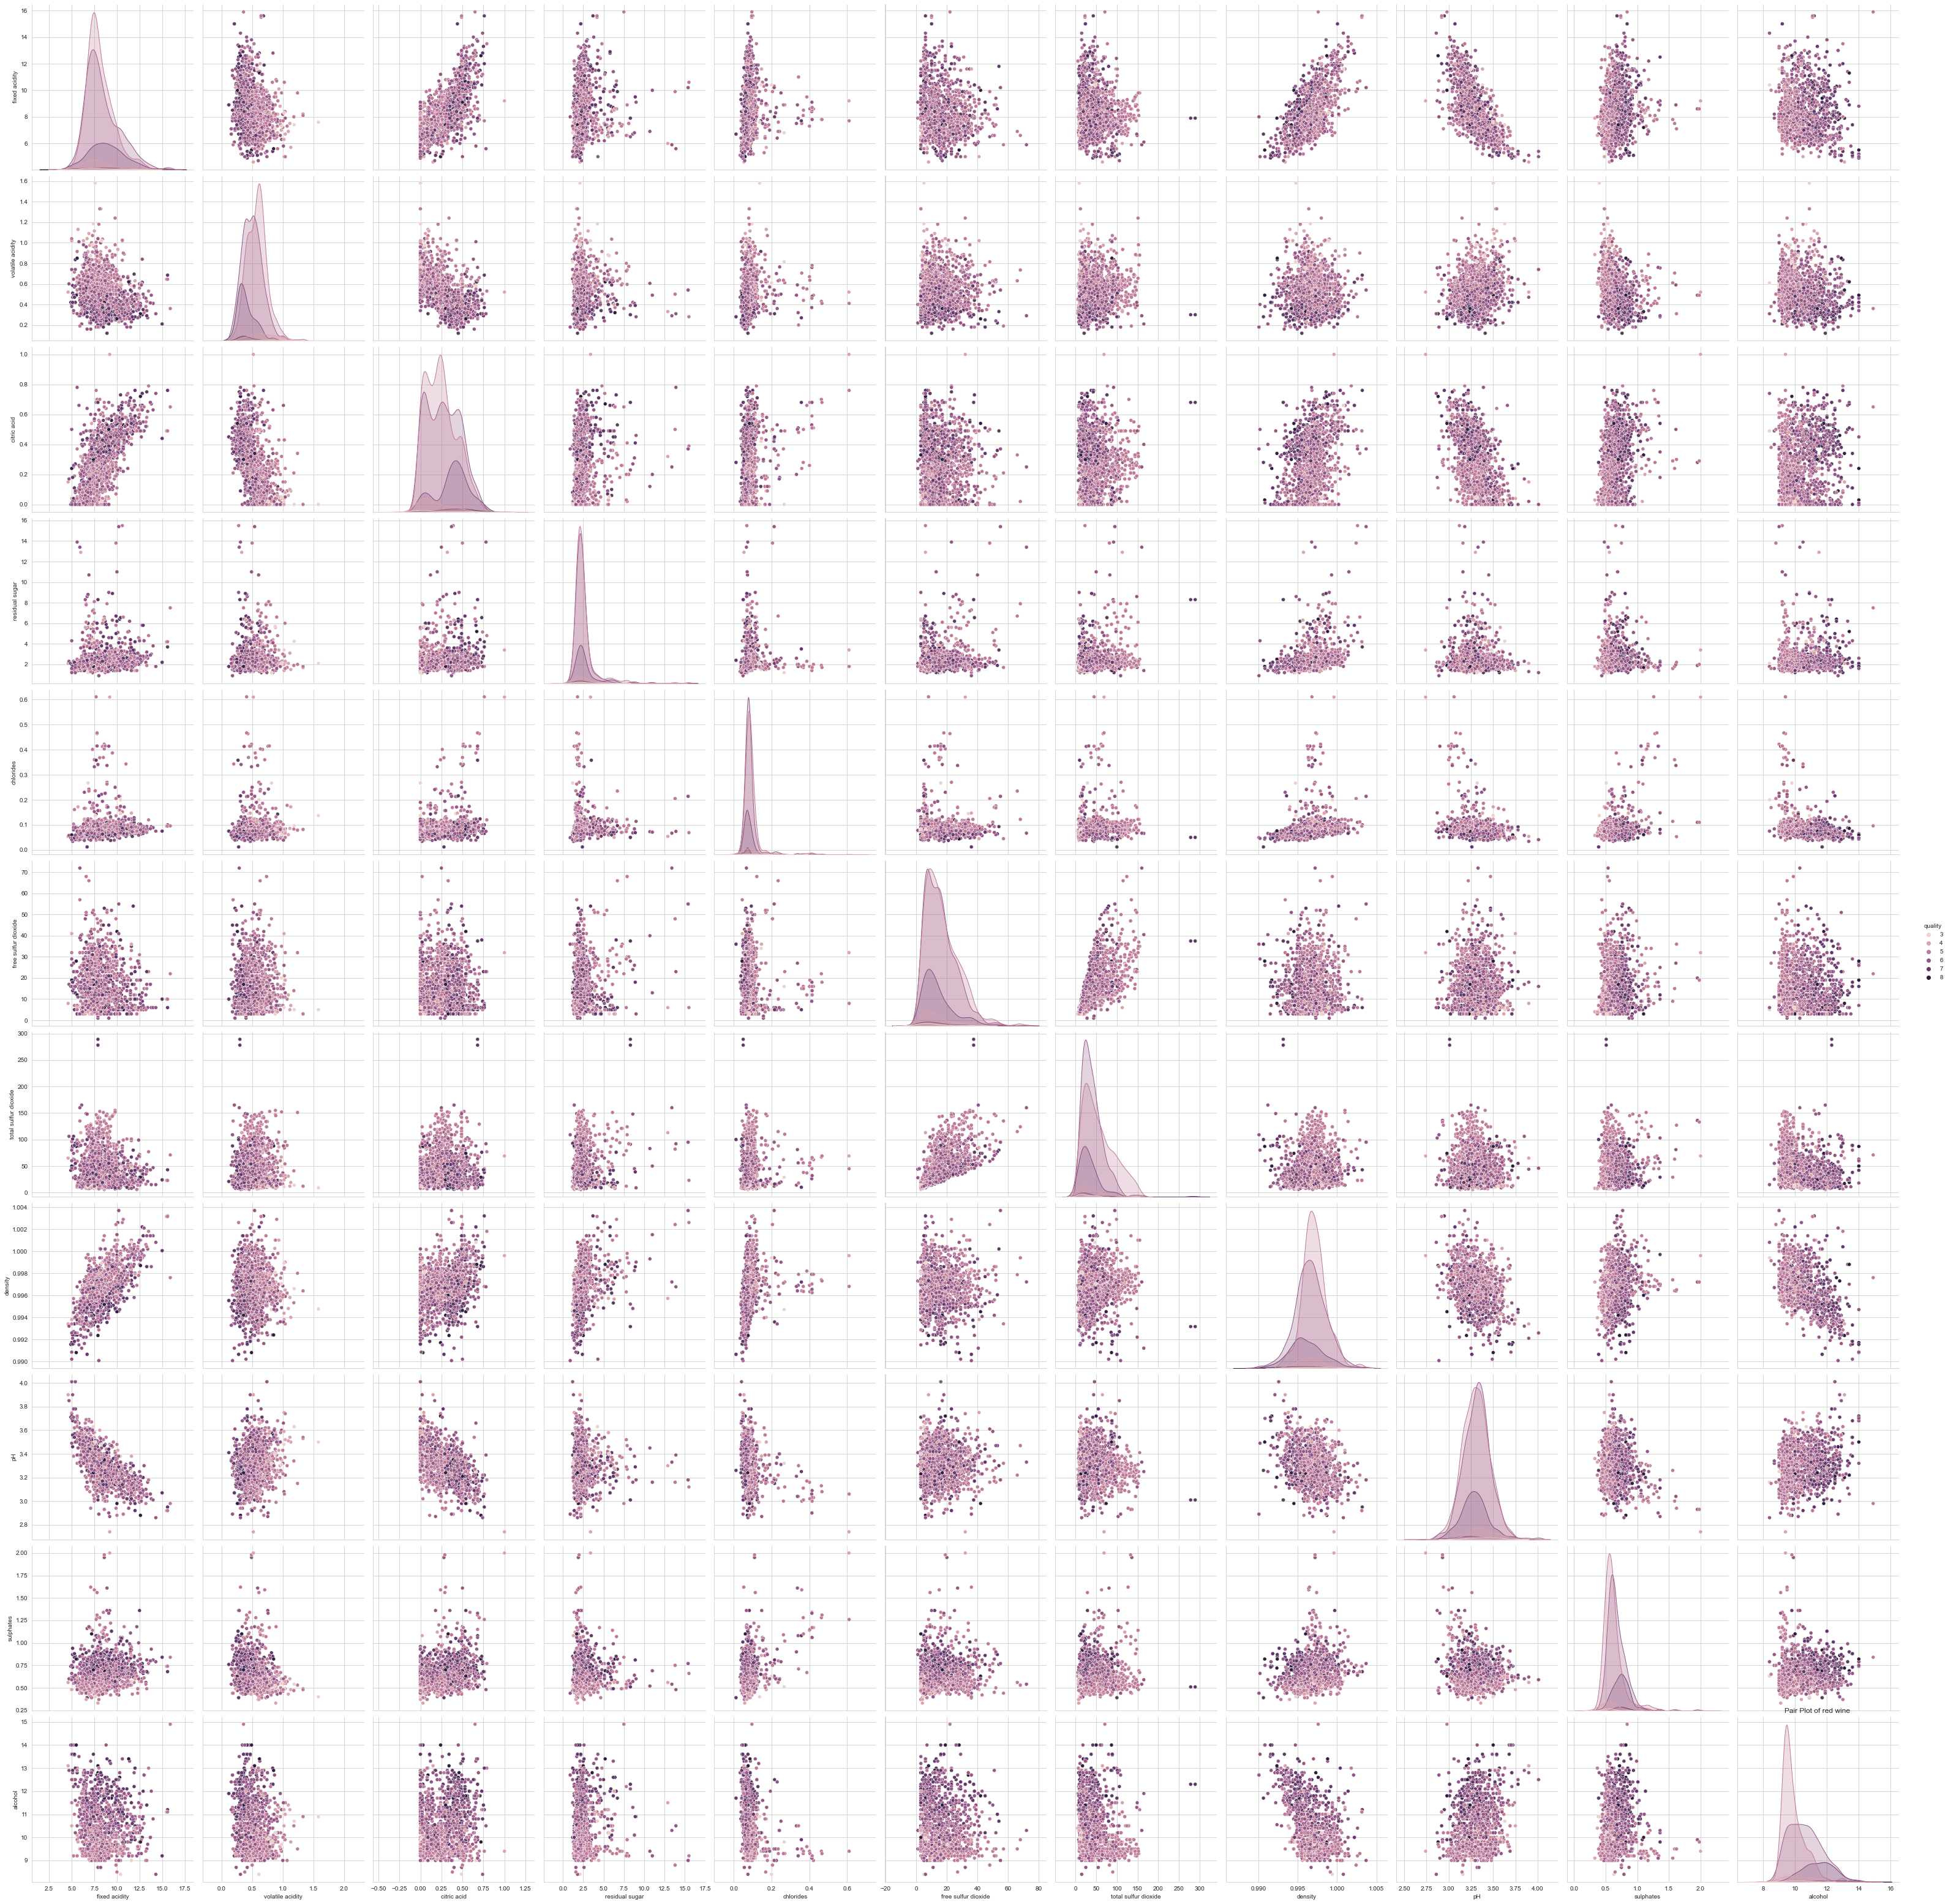

In [32]:

sbn.set_style("whitegrid")
sbn.pairplot(df, hue="quality", vars=['fixed acidity', 'volatile acidity', "citric acid",'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'], size=4);
plt.title("Pair Plot of red wine ");
plt.show();

First of all, pair plot is used to perform scatter plot on the number of features (N) in the dataset. Pairplot plots scatter plot of all possible combinations of features i.e. NC2 combinations
Furthermore, Diagonal plots indicates the PDFs w.r.t. all features to indicate the parental level of education . As discussed in previous observation only PDF of feature concludes some information. Rest of the PDFs are totally overlapped hence we can't make any conclusion here.

# Plot the Distribution plots for the features

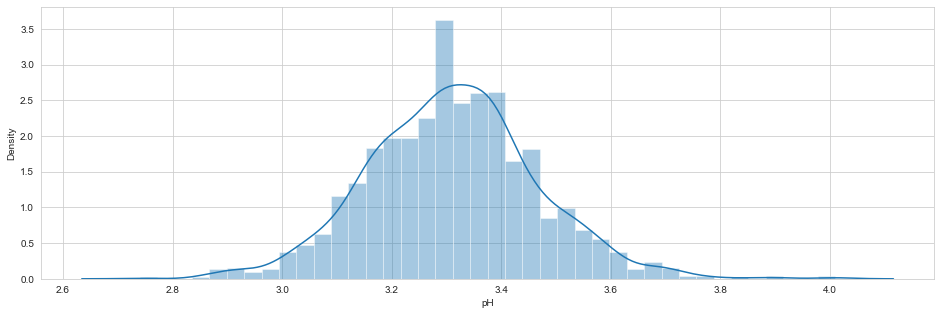

In [33]:

plt.figure(figsize=(16,5))
sns.distplot(df['pH'])
plt.show()

above normal distribution plot pH level is normally distributed 

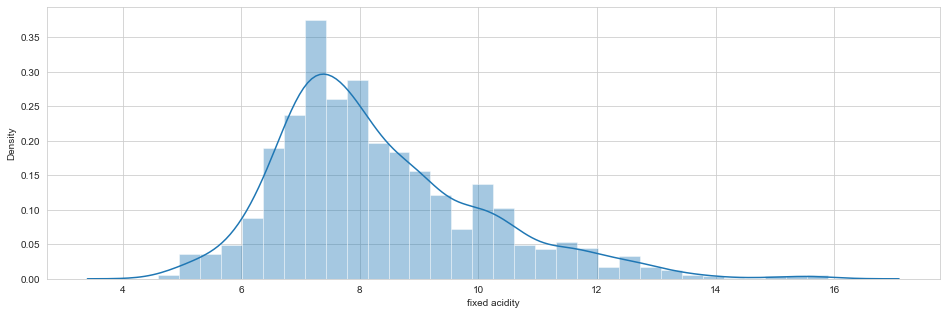

In [35]:
plt.figure(figsize=(16,5))
sns.distplot(df['fixed acidity'])
plt.show()

fixed acidity is also nomally distrbuted 

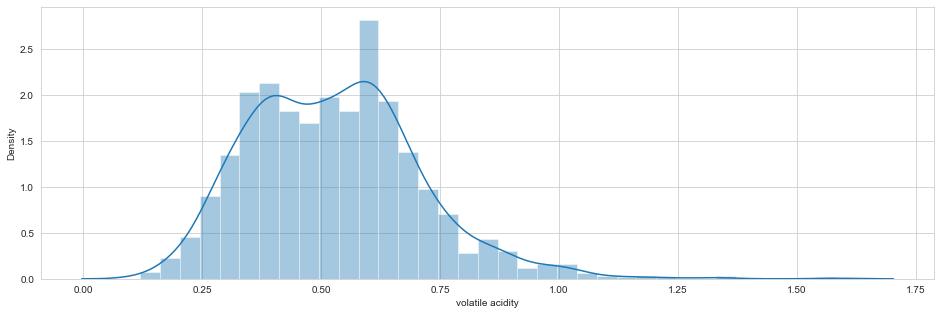

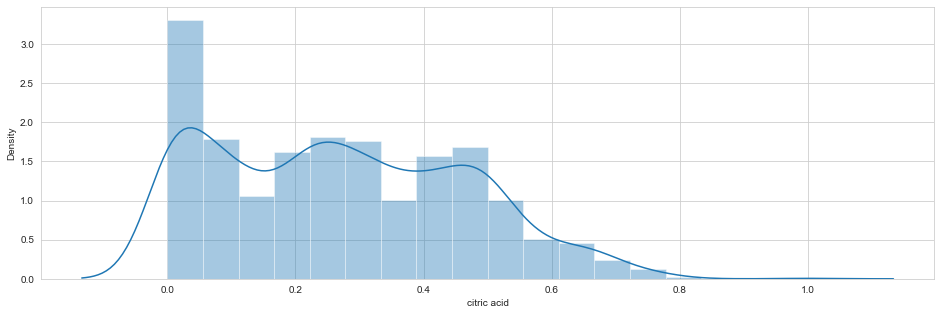

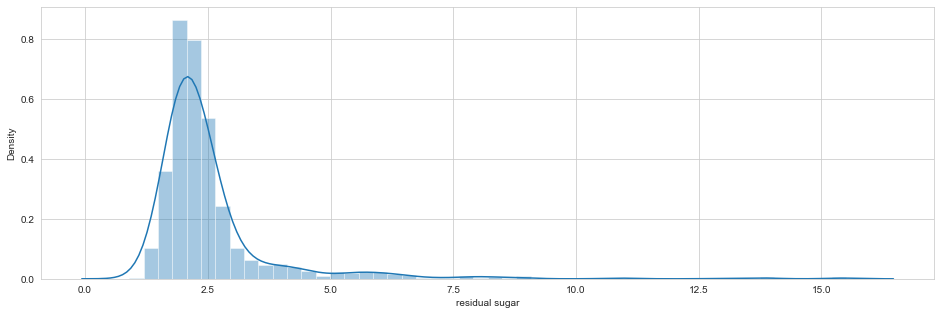

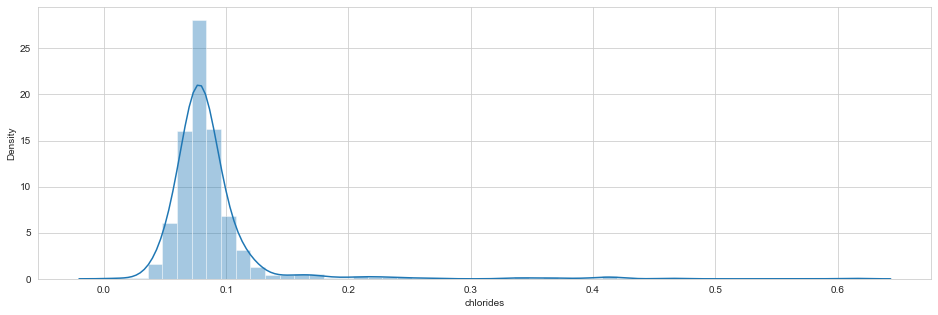

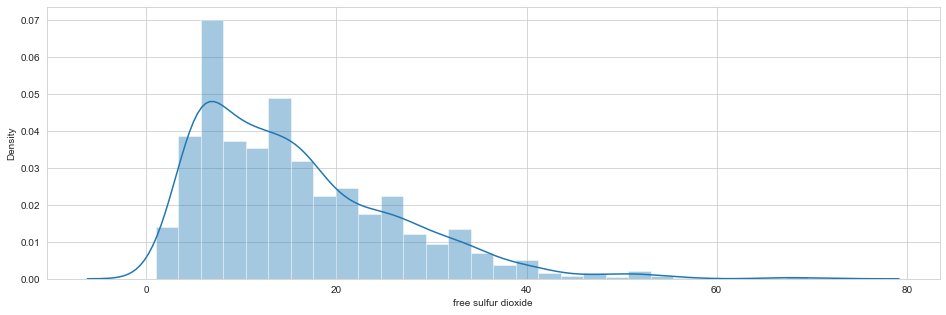

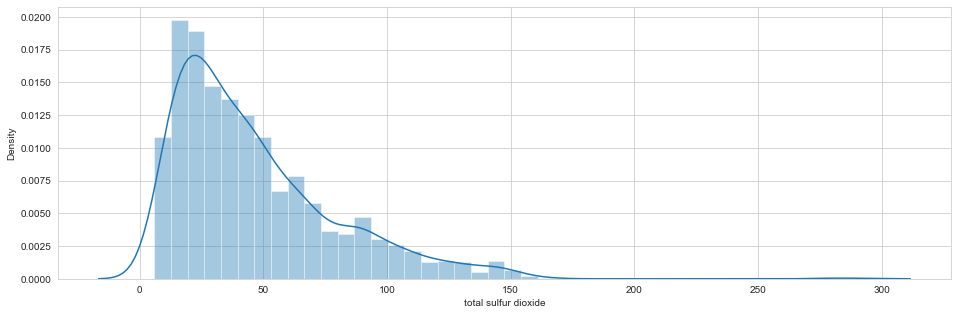

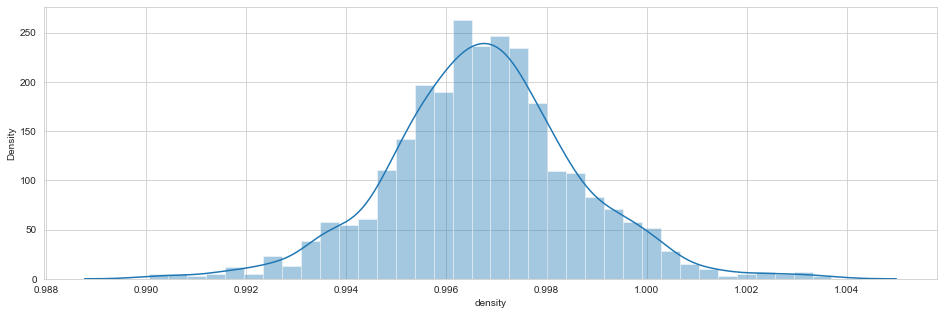

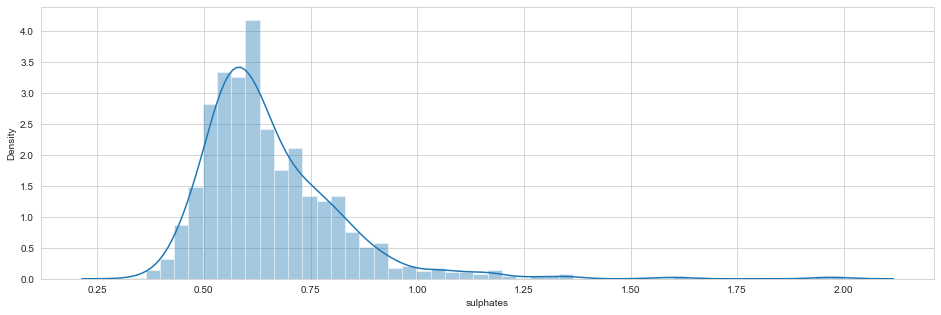

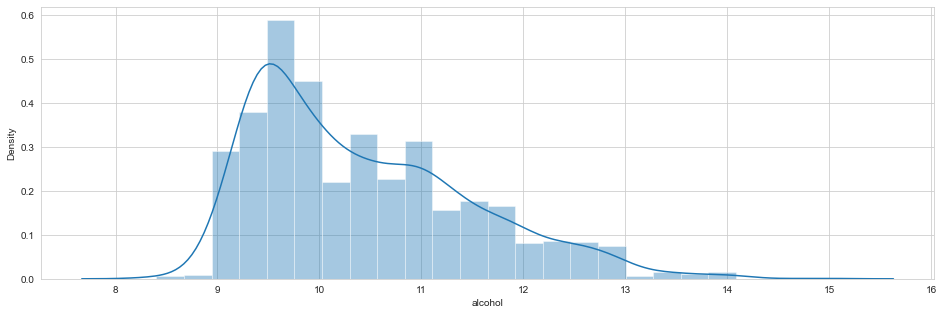

In [36]:
plt.figure(figsize=(16,5))
sns.distplot(df['volatile acidity'])
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(df['citric acid'])
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(df['residual sugar'])
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(df['chlorides'])
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(df['free sulfur dioxide'])
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(df['total sulfur dioxide'])
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(df['density'])
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(df['sulphates'])
plt.show()
plt.figure(figsize=(16,5))
sns.distplot(df['alcohol'])
plt.show()


volatile, citric acid, residual sugar,chlorides, free sulfur dioxide, total sulfur dioxide,sulphate, alcohol are postively skewd
density are normally distributed

# skewness

This distribution has skew fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64
This distribution has kurtosis fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64


<Figure size 1152x360 with 0 Axes>

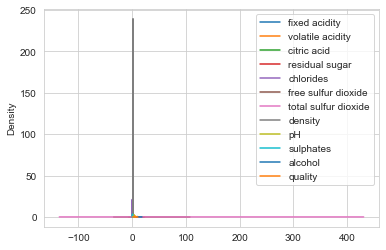

In [37]:

plt.figure(figsize=(16,5))
df.plot(kind = 'density')

print('This distribution has skew', df.skew())
print('This distribution has kurtosis', df.kurt())

# Model

# logestic regression

If quality value is less than or eqaul to 5 then it will be in class 0
If quality value is greater than 5 then it will be in class 1

In [38]:
df['quality'] = np.where(df['quality'] > 5, 1, 0)
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [39]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [41]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression() 
classifier.fit(X_train, y_train) 

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred = classifier.predict(X_test) 


In [45]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[113  41]
 [ 38 128]]


In [46]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.753125


# knn

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[104  50]
 [ 43 123]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       154
           1       0.71      0.74      0.73       166

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.71      0.71      0.71       320



# Decision Tress
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.


Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

In [52]:
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)    

In [53]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  


In [55]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[129,  56],
       [ 47, 168]], dtype=int64)

In [56]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7425


In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[129  56]
 [ 47 168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       185
           1       0.75      0.78      0.77       215

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400

Accuracy: 0.7425


# Random Forest

In [58]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [59]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [60]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8104166666666667


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[187  43]
 [ 48 202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       230
           1       0.82      0.81      0.82       250

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480

Accuracy: 0.8104166666666667


# SVM (Support Vector Machines)
1. Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

2. Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

3. Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.



In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=109)

In [63]:

from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
model.score(X_test,y_test)

0.7208333333333333

In [65]:
y_pred=model.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[161,  65],
       [ 69, 185]], dtype=int64)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[161  65]
 [ 69 185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       226
           1       0.74      0.73      0.73       254

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Accuracy: 0.7208333333333333


# Naive Bayes
Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.

In [67]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes

In [68]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [69]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [70]:
model.score(X_test,y_test)

0.7291666666666666

In [71]:
y_pred=model.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[164,  66],
       [ 64, 186]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[164  66]
 [ 64 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       230
           1       0.74      0.74      0.74       250

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480

Accuracy: 0.7291666666666666


In [ ]:
After modelling perform deployment by using Random Forest modelling

# Deployment

In [74]:
import pickle
pickle.dump(clf, open('wine_clf.pkl','wb'))

model = pickle.load(open('wine_clf.pkl','rb'))

http://127.0.0.1:5000/predict

# conclusion 
1. According to analysis and modeling of the data for best predictor

1. Random Forest = 81.4%

2. Logestic Regression = 76%
3. Decision Tree =74 %
4. Naive Bayes= 72.9%
5. SVM =72%
6. KNN = %


so that Random Forest and LogesticRegression are best model for predcition.